# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project</p>
## <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Employee Retention Prediction</p>

![My Image](employee-retention-rate.png)


<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:120%; text-align:left; color:black">

<h3 align="left"><font color=blue>Problem:</font></h3>

The aim of this project is to predict if an employee will stay with the company or leave based on different factors like their experience, education, and the size of the company they work for. Losing employees can be expensive and disruptive for a company. By predicting who might leave, the company can take steps to keep valuable employees and reduce turnover.

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:115%; text-align:left; color:black">

<h3 align="left"><font color=blue>Objectives:</font></h3>

* __Dataset Information__: Describe the dataset, including the number of records and features, and explain what each feature represents. Identify any missing values or irrelevant features that need to be addressed.

* __Exploratory Data Analysis (EDA)__: Analyze the dataset to find patterns and relationships between features. Visualize key variables to understand their distribution and how they might impact employee retention.

* __Model Building__: Create and train different machine learning models (like Decision Tree, Random Forest, Logistic Regression, and SVM) to predict whether an employee will leave the company.

* __Compare Models__: Test each model's performance and compare their accuracy, precision, and recall. Choose the best model for predicting employee turnover.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#data_info)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Numerical Variables Univariate Analysis](#num_uni)
    - [Step 4.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.3 | Categorical Features vs Target](#cat_target)
    - [Step 4.4 | Numerical Features vs Target](#num_target)
* [Step 5 | Data Preprocessing](#data_cle)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
        - [Step 5.2.1 | Unique Value](#unique_value)
        - [Step 5.2.2 | Missing Value Filling](#value_fill)
        - [Step 5.2.3 | Re-checking Missing Value](#re_checking)
    - [Step 5.3 |  Categorical Features Encoding](#encoding)
    - [Step 5.4 | Transforming Skewed Features ](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_md)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_ev)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_md)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_ev)
* [Step 8 | Logistic Regression Model Building](#lg)
    - [Step 8.1 | Logistic Base Model Definition](#lg_md)
    - [Step 8.2 | Logistic Hyperparameter Tuning](#lg_hp)
    - [Step 8.3 | Logistic Model Evaluation](#lg_ev)
* [Step 9 | Conclusion](#conclusion)

<h2 align="left"><font color=#90EE90>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;"> __Step 1 | Import Libraries__ </p>

⬆️ [Table of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:#90EE90 ; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 2 | Read Dataset__</p>

⬆️ [Table of Contents](#contents_tabel)

In [2]:
train_df = pd.read_csv('D:\\BIA\\Capstone Project\\aug_train.csv')

In [3]:
train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

<h2 align="left"><font color=blue>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __enrollee_id__ | Unique ID for each enrollee |
| __city__ | City code |
| __city_development_index__ | Development index of the city |
| __gender__ | Gender of the enrollee |
| __relevent_experience__ | Whether the enrollee has relevant experience |                     
| __enrolled_university__ | Enrollment status in a university course |
| __education_level__ | Education level of the enrollee 
| __major_discipline__ | Major discipline of study |                      
| __experience__ | Years of experience |
| __company_size__ | Size of the current employer's company |
| __company_type__ | Type of current employer's company |                      
| __last_new_job__ | Years since the last job change |              
| __training_hours__ | Hours of training  |
| __target__ | Target variable indicating whether the enrollee is looking for a job change (1 = yes, 0 = no) |

<a id="overview"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 3 | Dataset Overview__</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="data_info"></a>
# <b><span style='color:#90EE90'>Step 3.1 |</span><span style='color:green'> Dataset Basic Information</span></b>

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

<a id="num_statistics"></a>
# <b><span style='color:#90EE90'>Step 3.2 |</span><span style='color:green'> Summary Statistics for Numerical Variables</span></b>

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [84]:
null_values_summary = train_df.isnull().sum()
null_values_summary 

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [85]:
# Remove rows with any null values
train_df_cleaned = train_df.dropna()

# Check if null values are removed
null_values_summary_cleaned = train_df_cleaned.isnull().sum()
null_values_summary_cleaned


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [86]:
train_df_cleaned

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0


<a id="eda"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 4 | Exploratory Data Analysis (EDA)__</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="num_uni"></a>
# <b><span style='color:#90EE90'>Step 4.1 |</span><span style='color:green'> Numerical Variables Univariate Analysis</span></b>  

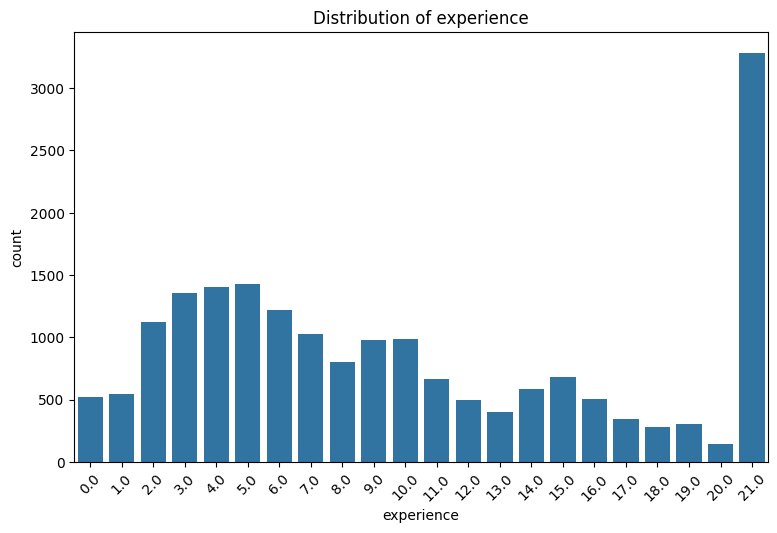

In [87]:
categorical_columns = [ 'experience']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The graph shows a bar chart representing the frequency of each experience level in the dataset. Each bar corresponds to an experience category (like '2 years', '5 years', etc.), and its height indicates how often that experience level appears. The x-axis shows the experience levels, and the y-axis shows the count. The labels are rotated for better readability, and the layout is neatly organized without overlapping elements.__



<a id="cat_uni"></a>
# <b><span style='color:#90EE90'>Step 4.2 |</span><span style='color:green'> Categorical Variables Univariate Analysis</span></b>  

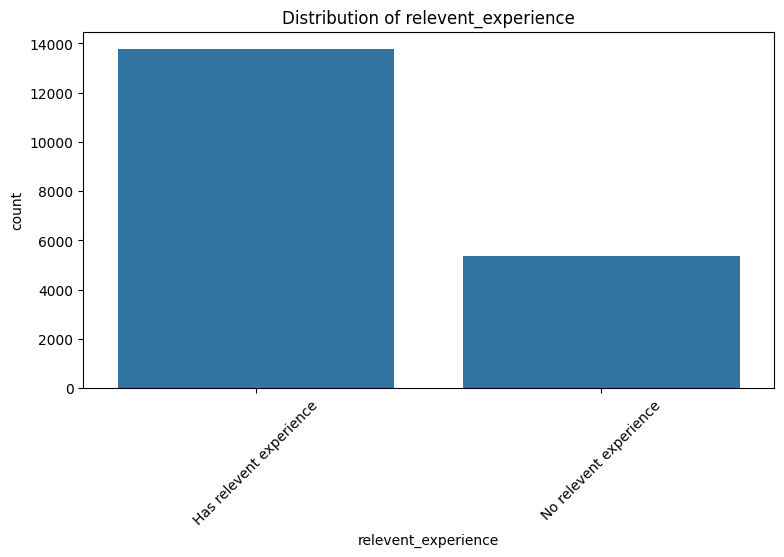

In [88]:
categorical_columns = [ 'relevent_experience']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The graph displays a bar chart showing the distribution of the 'relevant_experience' column. Each bar represents a different category within 'relevant_experience', with the bar height indicating the count of occurrences for each category. The x-axis labels the categories, and the y-axis shows the frequency. The labels are rotated for clarity, and the layout is adjusted to ensure everything fits well.__



<a id="cat_target"></a>
# <b><span style='color:#90EE90'>Step 4.3 |</span><span style='color:green'> Categorical Features vs Target</span></b>  

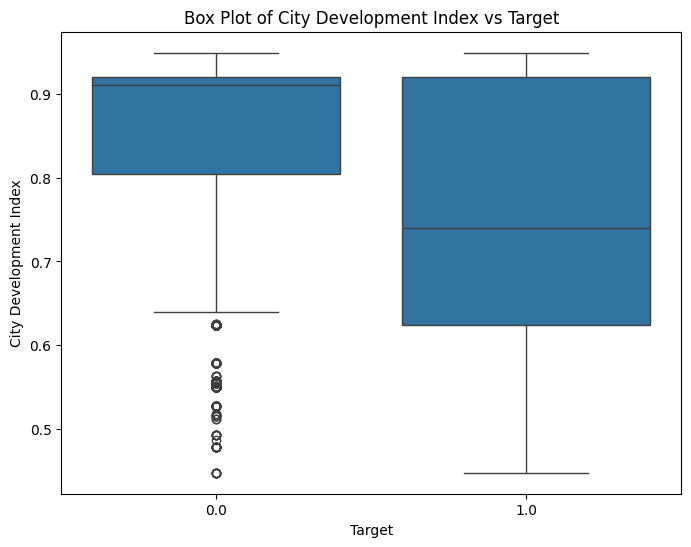

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='city_development_index', data=train_df)
plt.title('Box Plot of City Development Index vs Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The graph shows a box plot comparing 'City Development Index' with 'Target'. Each box represents the distribution of 'City Development Index' values for different 'Target' categories. The plot reveals the median, quartiles, and potential outliers in 'City Development Index' for each 'Target' group. The x-axis labels 'Target' categories, while the y-axis displays 'City Development Index' values.__



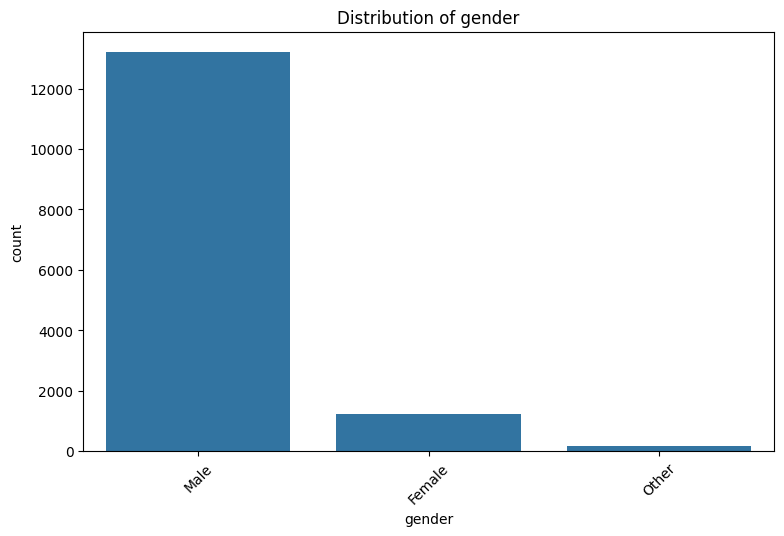

In [90]:
categorical_columns = [ 'gender']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The graph displays a bar chart showing the distribution of the 'gender' column. Each bar represents the count of each gender category in the dataset. The height of the bars indicates how many occurrences there are for each gender. The x-axis shows the different gender categories, and the y-axis shows the count. The labels are rotated for readability, and the layout is adjusted for clarity.__

<a id="num_target"></a>
# <b><span style='color:#90EE90'>Step 4.4 |</span><span style='color:green'> Numerical Features vs Target</span></b>  

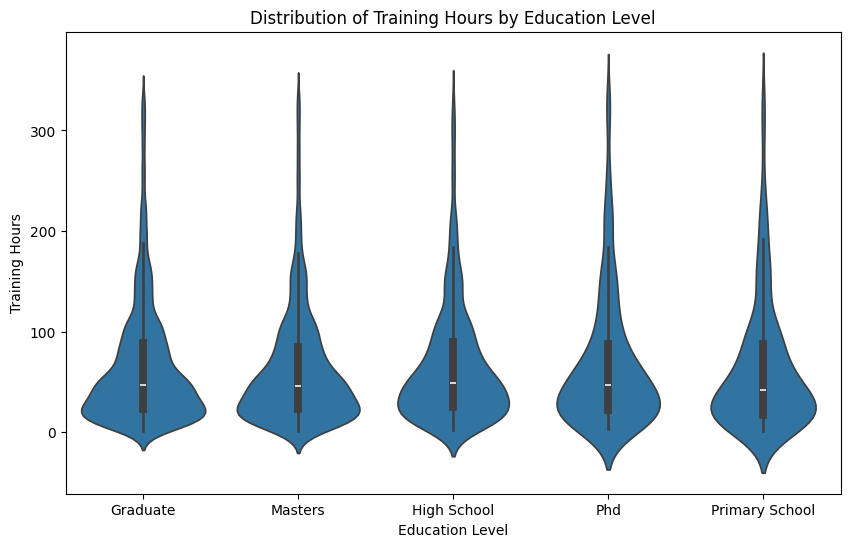

In [92]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='education_level', y='training_hours', data=train_df)

plt.xlabel('Education Level')
plt.ylabel('Training Hours')
plt.title('Distribution of Training Hours by Education Level')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The graph displays a violin plot illustrating the distribution of 'Training Hours' across different 'Education Level' categories. Each violin shape shows the density of 'Training Hours' for each education level, with wider sections indicating higher density. The x-axis represents education levels, while the y-axis shows training hours. This plot helps visualize the spread and distribution of training hours within each education level category.__

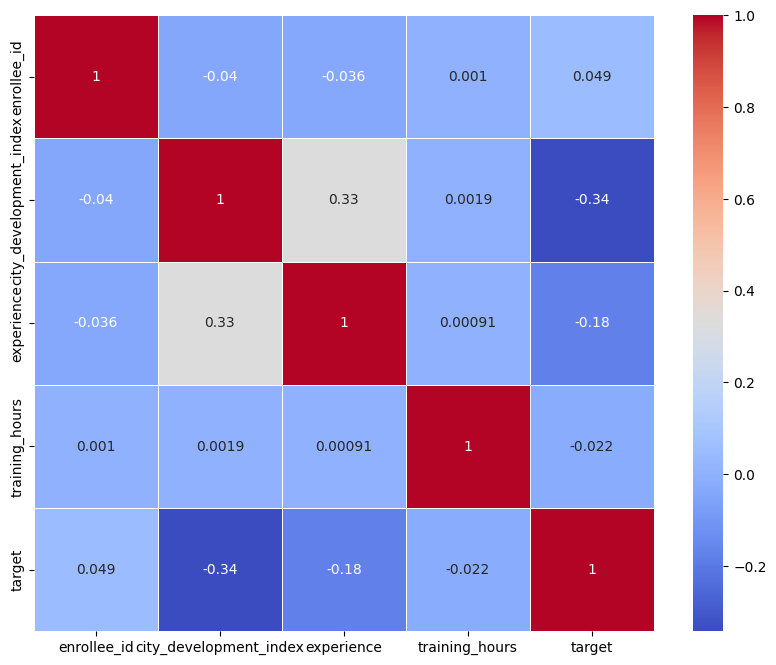

In [93]:
numeric_data = train_df.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__This heatmap shows the correlation between different numerical features in our dataset. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.__

__We can see that 'city_development_index' has a moderate negative correlation with the 'target', indicating that higher development index values might be associated with a lower likelihood of a positive target outcome.__

__Other features show weak correlations with each other and the target.__

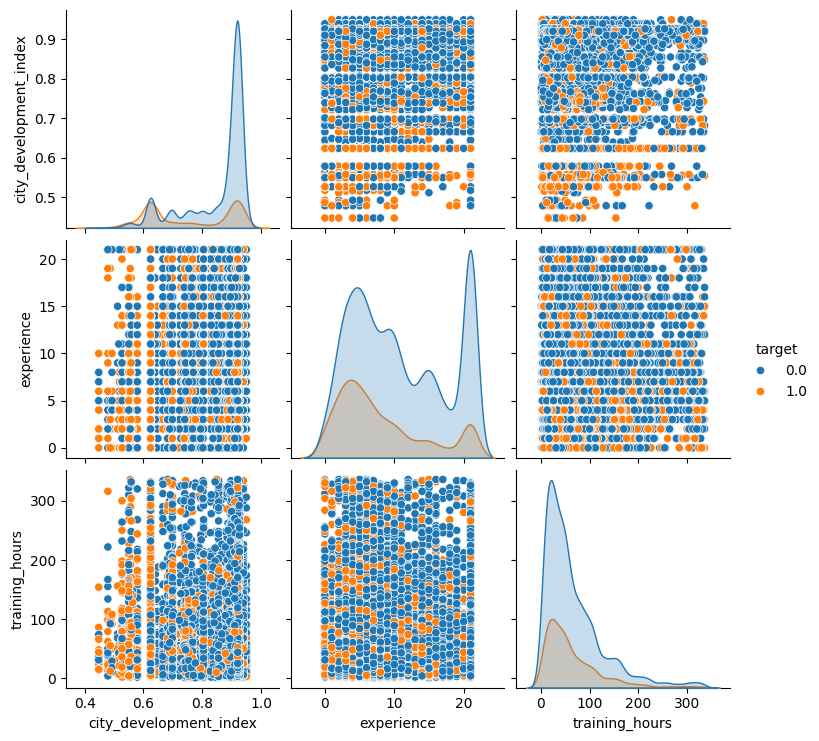

In [94]:
train_df['experience'] = train_df['experience'].replace({'>20': 21, '<1': 0}).astype(float)

selected_columns = ['city_development_index', 'experience', 'training_hours', 'target']

sns.pairplot(train_df[selected_columns], hue='target')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The pair plot visualizes the relationships between ‘city_development_index’, ‘experience’, ‘training_hours’ with respect to the target variable.__

__Each point represents an individual in the dataset, colored by their target outcome.__

__The diagonal plots show the distribution of each numerical feature, while the off-diagonal plots reveal how these features interact with each other and the target variable.__

__This graph uses color to represent two different target categories: blue points (target = 0.0) and orange points (target = 1.0).__

<a id="data_cle"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 5 | Data Cleaning__</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#90EE90'>Step 5.1 |</span><span style='color:green'> Irrelevant Features Removal</span></b>

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:115%; text-align:left; color:black">

In this project, I removed irrelevant features such as 'enrollee_id', which serves only as an identifier, and other columns with high missing values like 'company_size' and 'company_type'. This process enhances model performance by reducing noise and focusing on the most informative features.

____
<a id="missing"></a>
# <b><span style='color:#90EE90'>Step 5.2 |</span><span style='color:green'> Missing Value Treatment</span></b>

In [96]:
train_df_cleaned.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [97]:
train_df_cleaned.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


____
<a id="encoding"></a>
# <b><span style='color:#90EE90'>Step 5.3 |</span><span style='color:green'> Categorical Features Encoding</span></b>

In [98]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   float64
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory us

In [99]:
le = LabelEncoder()

categorical_columns = ['gender', 'relevent_experience', 'enrolled_university',
                       'education_level', 'major_discipline', 'company_size',
                       'company_type', 'last_new_job']

for col in categorical_columns:
    train_df_cleaned[col] = le.fit_transform(train_df_cleaned[col])

In [100]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   int32  
 4   relevent_experience     8955 non-null   int32  
 5   enrolled_university     8955 non-null   int32  
 6   education_level         8955 non-null   int32  
 7   major_discipline        8955 non-null   int32  
 8   experience              8955 non-null   float64
 9   company_size            8955 non-null   int32  
 10  company_type            8955 non-null   int32  
 11  last_new_job            8955 non-null   int32  
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(3), int32(8), int64(2), object(1)

In [101]:
train_df_cleaned.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,1,1,2,0,5,15.0,4,5,4,47,0.0
4,666,city_162,0.767,1,0,2,1,5,21.0,4,1,3,8,0.0
7,402,city_46,0.762,1,0,2,0,5,13.0,7,5,4,18,1.0
8,27107,city_103,0.920,1,0,2,0,5,7.0,4,5,0,46,1.0
11,23853,city_103,0.920,1,0,2,0,5,5.0,6,5,0,108,0.0


____
<a id="transform"></a>
# <b><span style='color:#90EE90'>Step 5.4 |</span><span style='color:green'> Transforming Skewed Features</span></b>

In [102]:
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['city', 'gender', 'relevent_experience',
                                             'enrolled_university', 'education_level',
                                             'major_discipline', 'experience',
                                             'company_size', 'company_type', 'last_new_job'])


In [103]:
X = train_df_cleaned.drop('target', axis=1)
y = train_df_cleaned['target']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="dt"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 6 | Decision Tree Model Building__</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_md"></a>
# <b><span style='color:#90EE90'>Step 6.1 |</span><span style='color:green'> DT Base Model Definition</span></b>

In [106]:
dt = DecisionTreeClassifier()

In [107]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
y_pred = dt.predict(X_test)

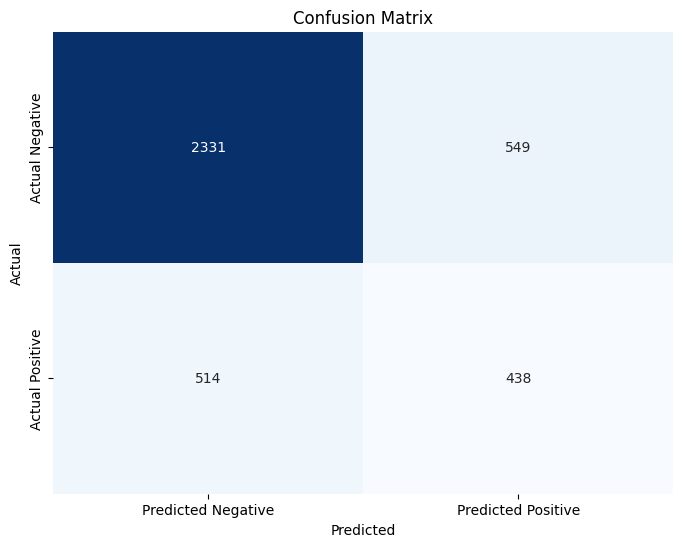

In [109]:
conf_matrix = np.array([[2331, 549], [514, 438]])

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [110]:
print("Decision Tree Model for Segment Interpretation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Model for Segment Interpretation:
Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1486
         1.0       0.36      0.39      0.37       305

    accuracy                           0.78      1791
   macro avg       0.62      0.62      0.62      1791
weighted avg       0.79      0.78      0.78      1791



____
<a id="dt_hp"></a>
# <b><span style='color:#90EE90'>Step 6.2 |</span><span style='color:green'> DT  Hyperparameter Tuning</span></b>

In [111]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],    
    'max_depth': [None, 10, 20, 30, 50, 100],   
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 5, 10],     
    'class_weight': [None, 'balanced'],       
    'max_features': [None, 'sqrt', 'log2'],   
    'min_impurity_decrease': [0.0, 0.01, 0.1] 
}


In [112]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 50, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [113]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_dt_model.predict(X_test)

Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


____
<a id="dt_ev"></a>
# <b><span style='color:#90EE90'>Step 6.3 |</span><span style='color:green'> DT Model Evaluation</span></b>

In [114]:
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')

In [115]:
dt_evaluation = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [best_accuracy],
    'Precision': [best_precision],
    'Recall': [best_recall],
    'F1-Score': [best_f1],
})

In [116]:
dt_evaluation

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.853155,0.852205,0.853155,0.852671


<a id="rf"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 7 | Random Forest Model Building__</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="rf_md"></a>
# <b><span style='color:#90EE90'>Step 7.1 |</span><span style='color:green'> RF Base Model Definition</span></b>

In [117]:
rf = RandomForestClassifier(random_state=42)


rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
y_pred = rf.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

Random Forest Model Accuracy: 84.48%


In [120]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

____
<a id="rf_hp"></a>
# <b><span style='color:#90EE90'>Step 7.2 |</span><span style='color:green'> RF Hyperparameter Tuning</span></b>

In [121]:
param_grid = {
    'n_estimators': [10, 50, 100, 150],
     'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 4, 1),
    'max_features': ['auto', 'log2']
}

In [122]:
rf = RandomForestClassifier(random_state=77)

In [123]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [124]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=77), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy', verbose=2)

In [125]:
# Get the best hyperparameters
best_params_rf = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

Best Hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}


In [126]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [127]:
best_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Accuracy of Best Random Forest Model after Hyperparameter Tuning: {best_accuracy_rf * 100:.2f}%')

Accuracy of Best Random Forest Model after Hyperparameter Tuning: 82.97%


____
<a id="rf_ev"></a>
# <b><span style='color:#90EE90'>Step 7.3 |</span><span style='color:green'> RF Model Evaluation</span></b>

In [128]:
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Random Forest Model Accuracy: 0.8447794528196538
Confusion Matrix:
 [[1486    0]
 [ 305    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1486
         1.0       0.00      0.00      0.00       305

    accuracy                           0.83      1791
   macro avg       0.41      0.50      0.45      1791
weighted avg       0.69      0.83      0.75      1791



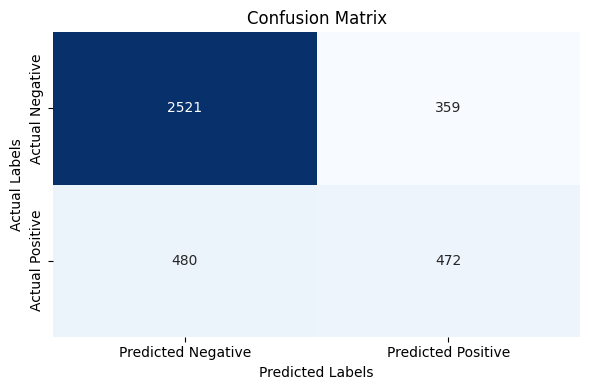

In [129]:
confusion_matrix = np.array([[2521, 359], [480, 472]])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.tight_layout()
plt.show()

In [130]:
rf_evaluation = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [best_accuracy_rf],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
})


In [131]:
rf_evaluation

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.829704,0.828074,0.844779,0.833021


<a id="lg"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 8 | Logistic Regression Model Building__</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="lg_md"></a>
# <b><span style='color:#90EE90'>Step 8.1 |</span><span style='color:green'> Logistic Base Model Definition</span></b>

In [132]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [133]:
y_pred = lr.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.8453378001116695


____
<a id="lg_hp"></a>
# <b><span style='color:#90EE90'>Step 8.2 |</span><span style='color:green'> Logistic Hyperparameter Tuning</span></b>

In [135]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [136]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [137]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [138]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8591577422838362


____
<a id="lg_ev"></a>
# <b><span style='color:#90EE90'>Step 8.3 |</span><span style='color:green'> Logistic Model Evaluation</span></b>

In [139]:
best_lr = grid_search.best_estimator_

y_pred = best_lr.predict(X_test)

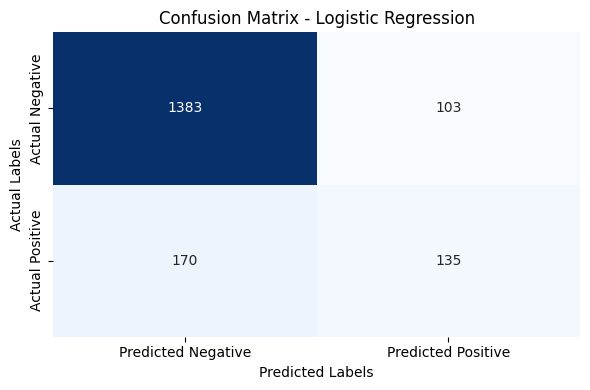

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Show the plot
plt.tight_layout()
plt.show()


In [141]:
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Model Accuracy: 0.847571189279732
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1486
         1.0       0.57      0.44      0.50       305

    accuracy                           0.85      1791
   macro avg       0.73      0.69      0.70      1791
weighted avg       0.84      0.85      0.84      1791



In [142]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [143]:
logistic_evaluation = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
})

In [144]:
logistic_evaluation

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.847571,0.835476,0.847571,0.839847


<a id="conclusion"></a>
# <p style="background-color:#90EE90; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">__Step 9 | Conclusion__</p>

⬆️ [Table of Contents](#contents_tabel)

In [147]:
import pandas as pd
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation]

# Concatenate all evaluations into a single DataFrame
results = pd.concat(all_evaluations, axis=0)

# Use the correct column name for recall
recall_column = 'Recall'
if recall_column in results.columns:
    results = results.sort_values(by=recall_column, ascending=False).round(4)
else:
    print(f"Column '{recall_column}' not found in the results DataFrame.")

results = results.reset_index(drop=True)
# Display the results
print(results)

                 Model  Accuracy  Precision  Recall  F1-Score
0        Decision Tree    0.8532     0.8522  0.8532    0.8527
1  Logistic Regression    0.8476     0.8355  0.8476    0.8398
2        Random Forest    0.8297     0.8281  0.8448    0.8330


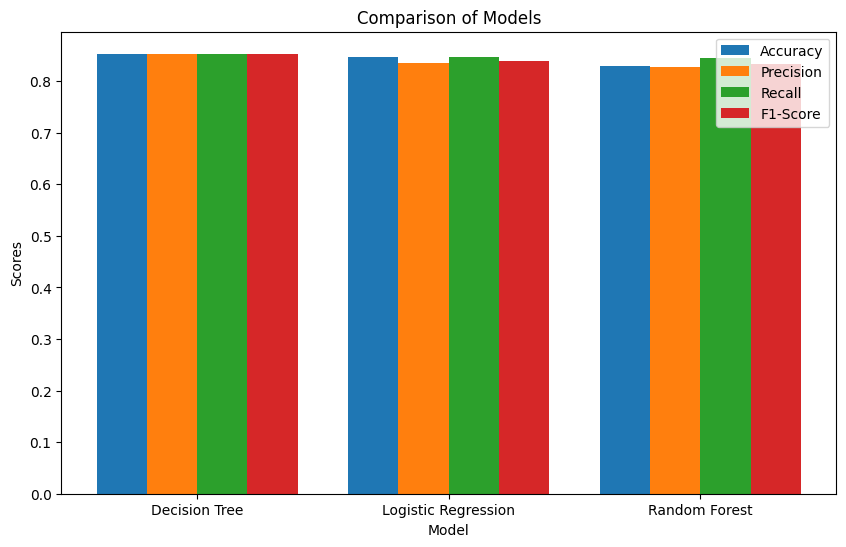

In [149]:
data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [0.8532, 0.8476, 0.8297],
    'Precision': [0.8522, 0.8355, 0.8281],
    'Recall': [0.8532, 0.8476, 0.8448],
    'F1-Score': [0.8527, 0.8398, 0.8330]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)
bar_width = 0.2
index = range(len(df['Model']))

plt.figure(figsize=(10, 6))

plt.bar(index, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], df['Precision'], width=bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], df['Recall'], width=bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], df['F1-Score'], width=bar_width, label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Models')
plt.xticks([i + 1.5 * bar_width for i in index], df['Model'])
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#90EE90; font-size:120%; text-align:left; color:black">

__The Decision Tree model outperformed other models in predicting employee retention with the highest accuracy. This indicates its superior capability in forecasting whether employees might change jobs. Thus, Desicion Tree is the most effective model for this task, providing valuable insights for improving employee retention and optimizing workforce management strategies.__

